**IMPOR LIBRARY**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import seaborn as sns

**DATA UNDERSTANDING**

In [2]:
# Path dataset
dataset_path = 'S:/SEMESTER7/pcd/klasifikasi butterfly/dataset'

In [3]:
# Preprocess and augment the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Preprocess the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    dataset_path + '/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 25279 images belonging to 200 classes.
Found 25279 images belonging to 200 classes.


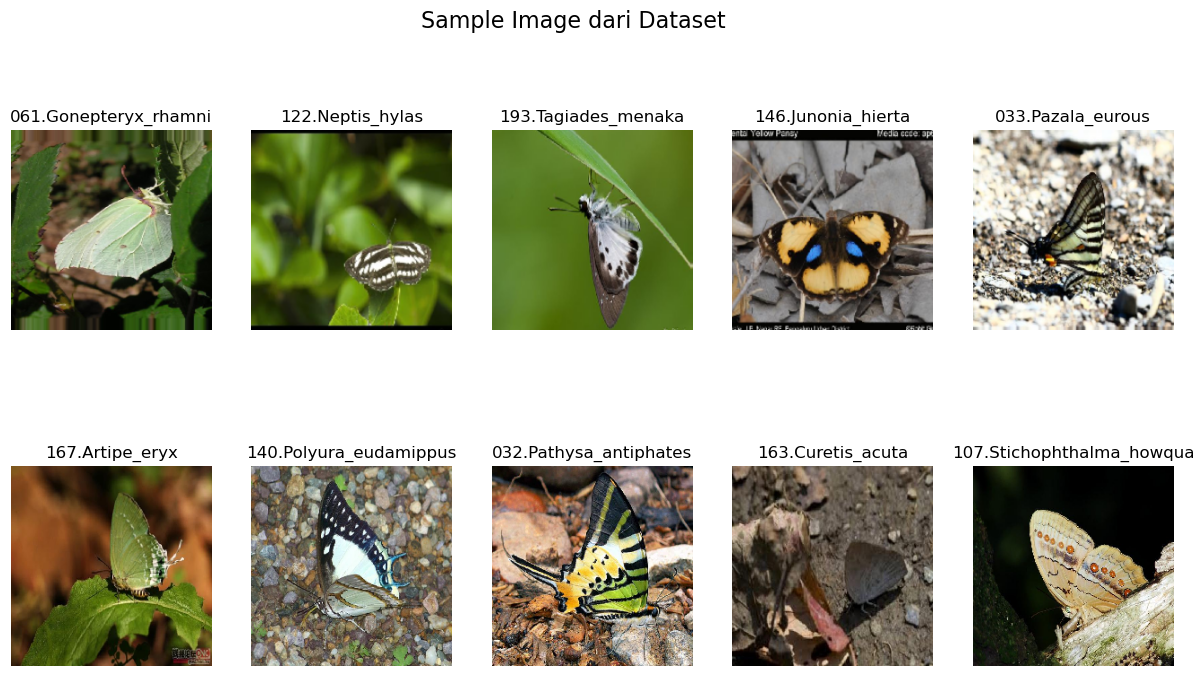

In [4]:
# Get class names
class_names = list(train_generator.class_indices.keys())

# Visualize 10 images from both training and validation sets
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Sample Image dari Dataset', fontsize=16)

for ax_row, generator in zip(axes, [train_generator, val_generator]):
    images, labels = generator.next()
    for ax, image, label in zip(ax_row, images, labels):
        ax.imshow(image)
        ax.set_title(class_names[int(label.argmax())])
        ax.axis('off')

plt.show()

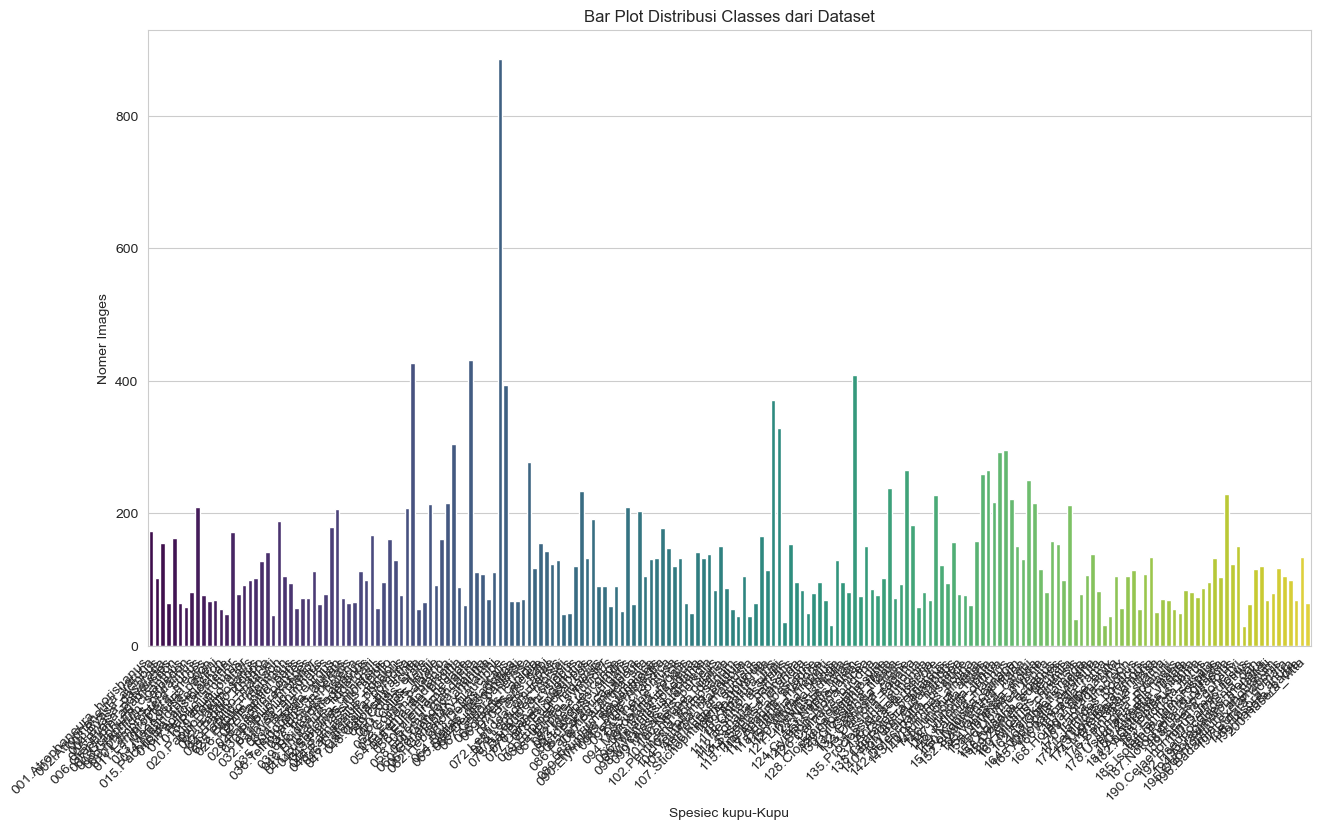

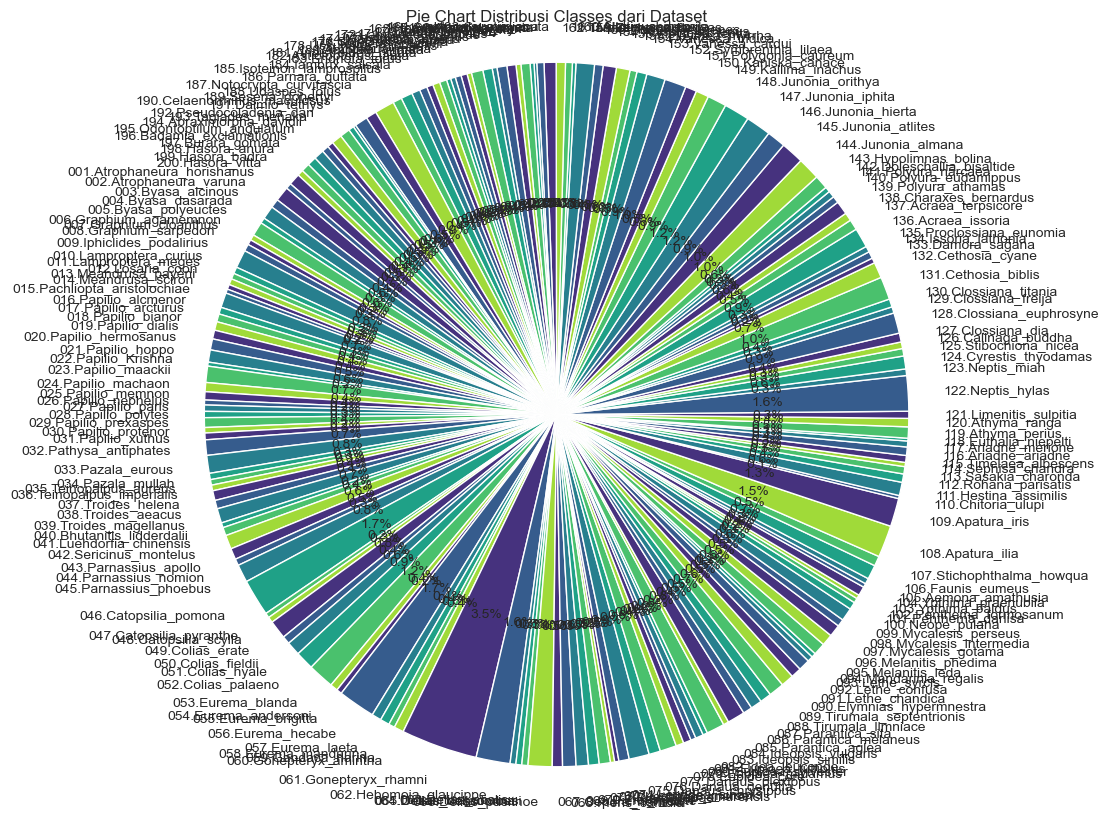

In [5]:

# Count the number of images in each class
class_counts = train_generator.classes
class_counts = [class_counts.tolist().count(i) for i in range(len(class_names))]

# Plot bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
fig = sns.barplot(x=class_names, y=class_counts, palette="viridis")
plt.xlabel('Spesiec kupu-Kupu')
plt.ylabel('Nomer Images')
plt.title('Bar Plot Distribusi Classes dari Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()
# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.axis('equal')
plt.title('Pie Chart Distribusi Classes dari Dataset')
plt.show()


**MODELLING**

In [6]:
# Load pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the layers of the pre-trained model
base_model.trainable = False

In [7]:
# Build the final model
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data=val_generator)

Epoch 1/25


790/790 [==============================] - 1702s 2s/step - loss: 3.6890 - accuracy: 0.2005 - val_loss: 2.1034 - val_accuracy: 0.4846
Epoch 2/25
790/790 [==============================] - 1695s 2s/step - loss: 2.4188 - accuracy: 0.3705 - val_loss: 1.5553 - val_accuracy: 0.5869
Epoch 3/25
790/790 [==============================] - 1852s 2s/step - loss: 2.0829 - accuracy: 0.4339 - val_loss: 1.3190 - val_accuracy: 0.6317
Epoch 4/25
790/790 [==============================] - 1779s 2s/step - loss: 1.9280 - accuracy: 0.4645 - val_loss: 1.1954 - val_accuracy: 0.6579
Epoch 5/25
790/790 [==============================] - 1553s 2s/step - loss: 1.8250 - accuracy: 0.4863 - val_loss: 1.1101 - val_accuracy: 0.6738
Epoch 6/25
790/790 [==============================] - 1424s 2s/step - loss: 1.7614 - accuracy: 0.4992 - val_loss: 1.1078 - val_accuracy: 0.6732
Epoch 7/25
790/790 [==============================] - 1408s 2s/step - loss: 1.7185 - accuracy: 0.5081 - val_loss: 1.0323 - val_accurac

**EVALUATION**

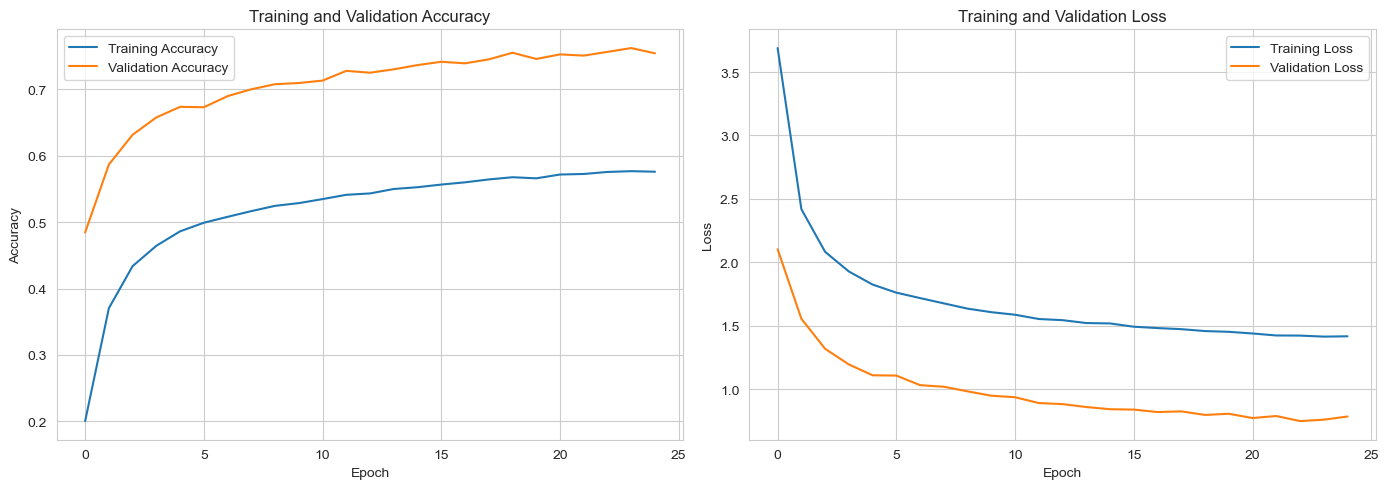

In [10]:
# Visualize training and validation accuracy and loss
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot training and validation accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot training and validation loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

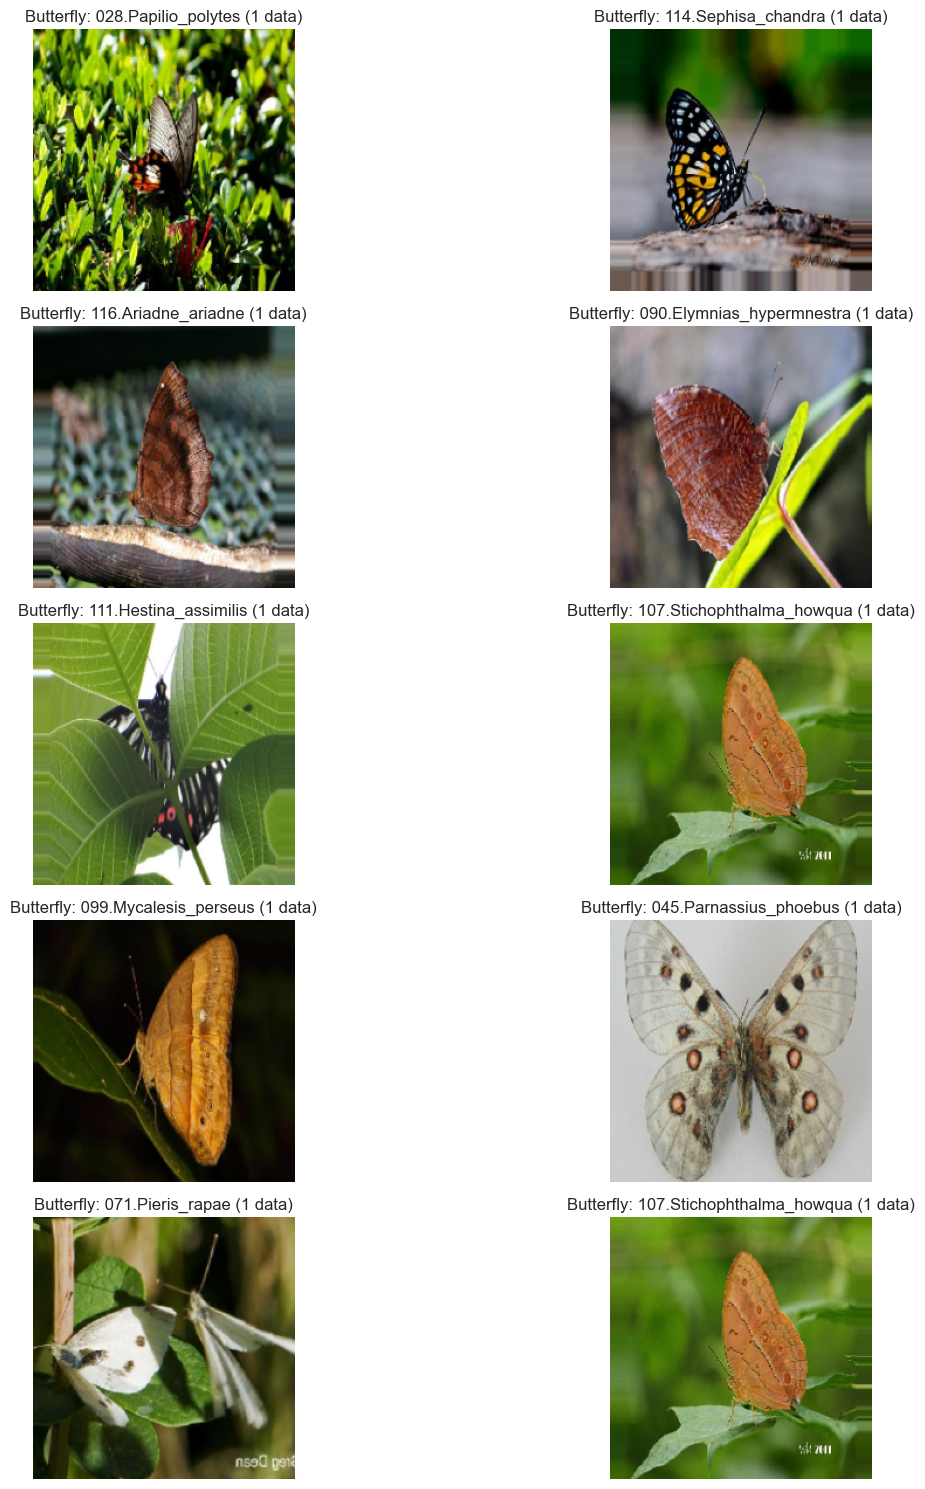

In [11]:
# Get a batch of data (you may need to adjust this based on your dataset size)
batch = train_generator.next()

# Extract features and labels from the batch
features, labels = batch

# Get class names
class_names = os.listdir(dataset_path + '/train')

# Visualize images from each class
data_count_per_class = {class_names[i]: list(labels[:, i]).count(1) for i in range(len(class_names))}

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for i in range(5):
    for j in range(2):
        # Select a class with available images
        classes_with_images = [k for k, v in data_count_per_class.items() if v > 0]
        if not classes_with_images:
            break

        l = np.random.choice(classes_with_images)
        images_in_class = features[np.argmax(labels, axis=1) == class_names.index(l)]

        if len(images_in_class) > 0:
            img = images_in_class[0]
            # Display the image with the class name and the number of data in that class
            ax[i, j].set_title(f"Butterfly: {l} ({data_count_per_class[l]} data)")
            ax[i, j].imshow(img)
            ax[i, j].axis('off')

plt.tight_layout()
plt.show()

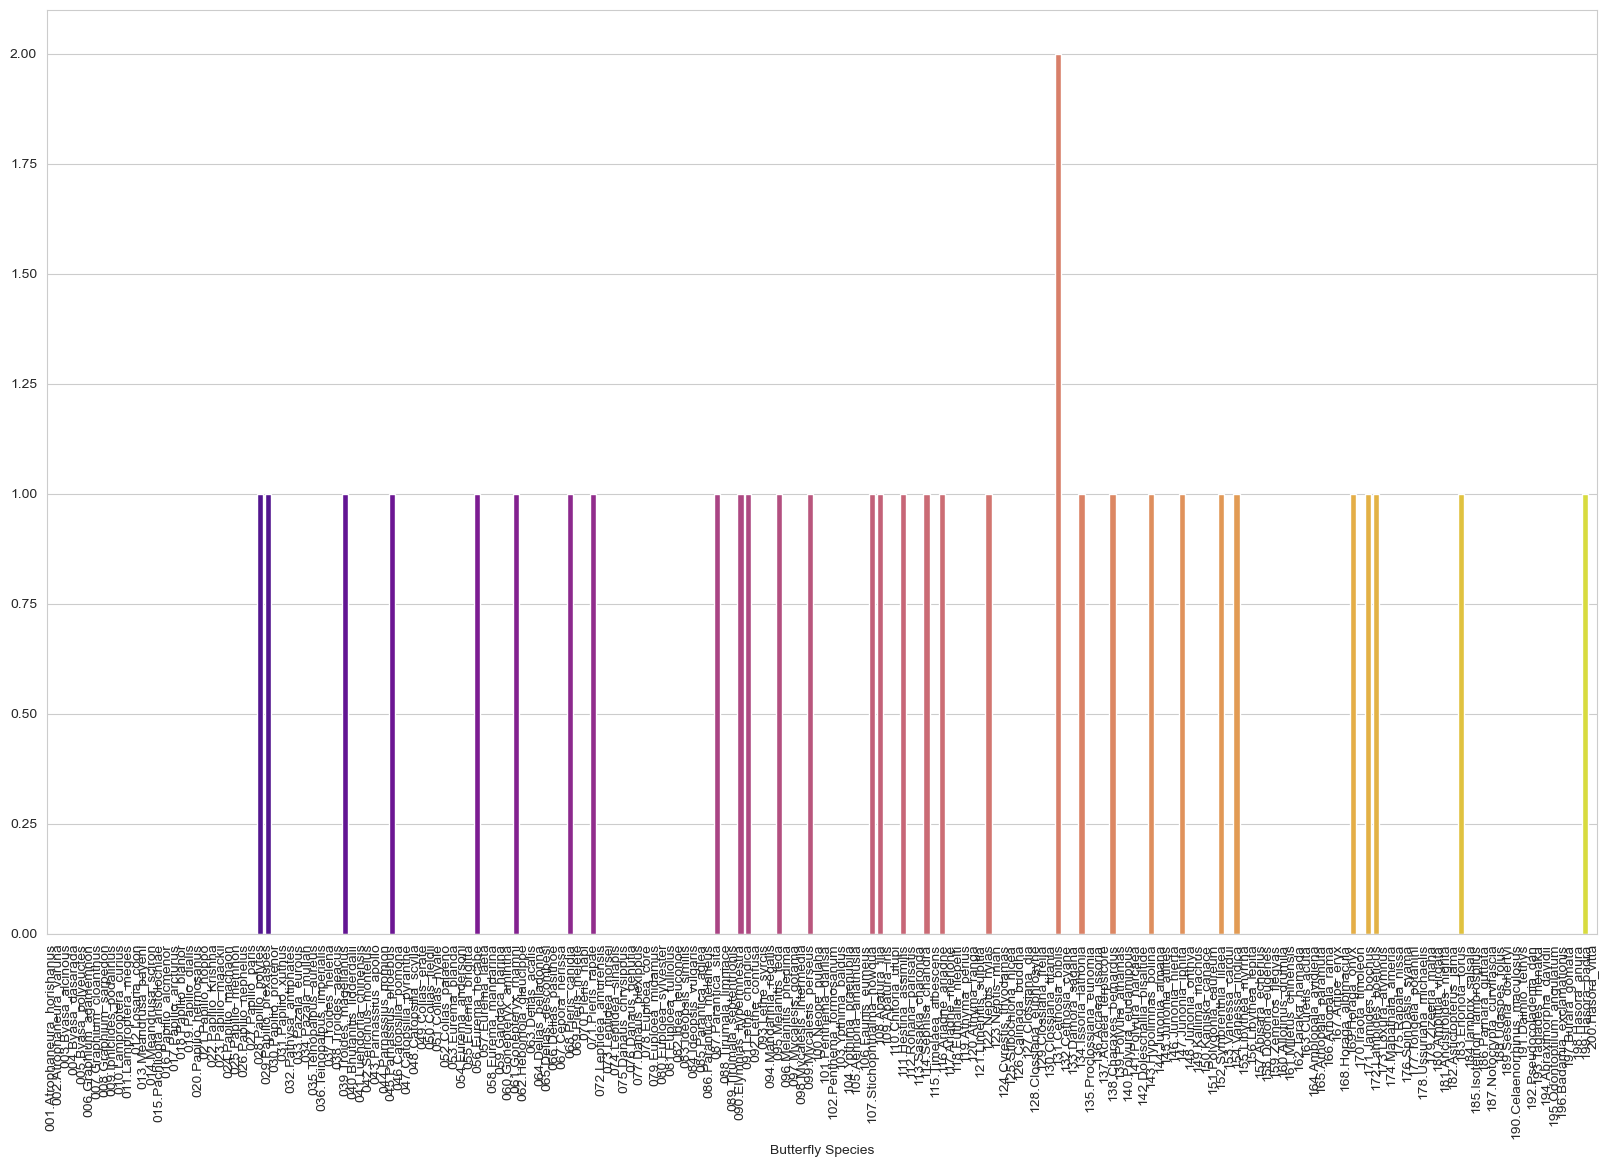

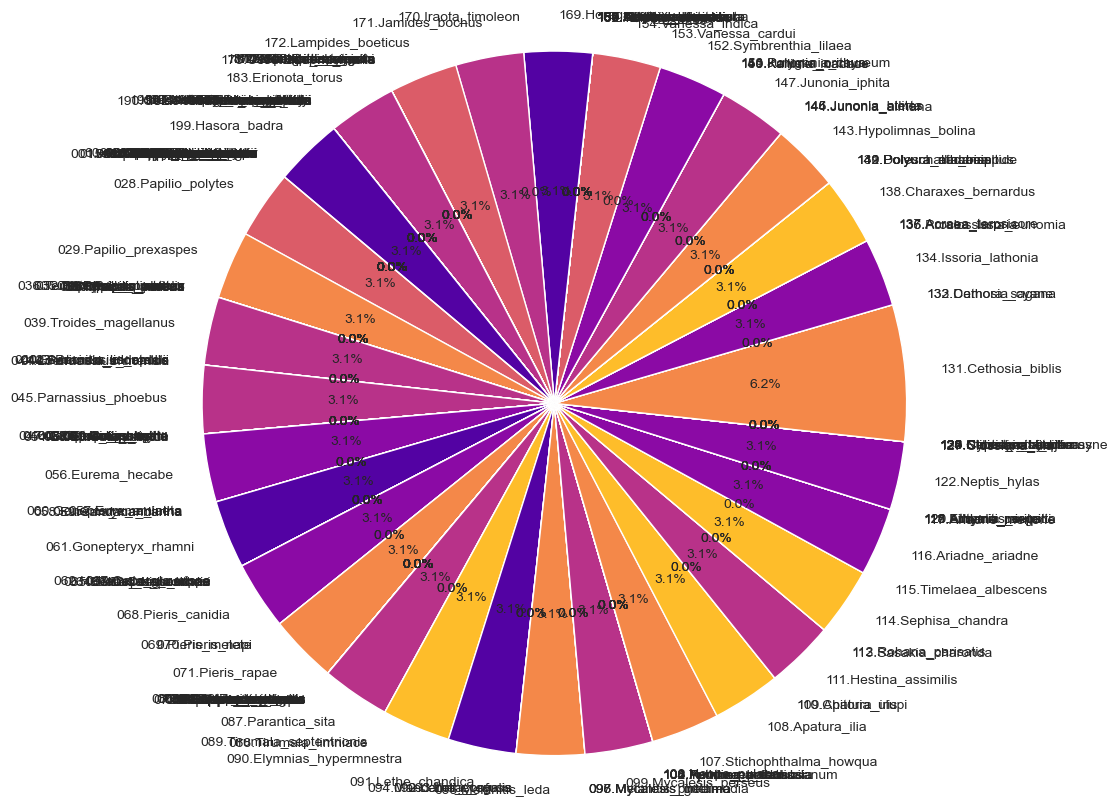

In [12]:
# Plot bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(20, 12))
fig = sns.barplot(x=list(data_count_per_class.keys()), y=list(data_count_per_class.values()), palette="plasma")
plt.xlabel('Butterfly Species')
plt.xticks(rotation=90)
plt.show()

# Calculate sizes for the pie chart
sizes = list(data_count_per_class.values())

# Get class names
class_names = list(data_count_per_class.keys())

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("plasma"))
plt.axis('equal')  
plt.show()


**DEPLOYMENT**

In [13]:
# Save the model
model.save("MODEL_KLASIFIKASI_KUPU-KUPU")

INFO:tensorflow:Assets written to: MODEL_KLASIFIKASI_KUPU-KUPU\assets


INFO:tensorflow:Assets written to: MODEL_KLASIFIKASI_KUPU-KUPU\assets
